In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import bt
import matplotlib.pyplot as plt

In [2]:
data = bt.get("msft, amzn, goog", start="2021-6-1", end="2022-5-11")

In [3]:
data.head(15)

,msft,amzn,goog
Date,,,
2021-06-01,245.967743,3218.649902,2429.810059
2021-06-02,245.868347,3233.989990,2421.280029
2021-06-03,244.287552,3187.010010,2404.610107
2021-06-04,249.338120,3206.219971,2451.760010
2021-06-07,252.340652,3198.010010,2466.090088
2021-06-08,251.107834,3264.110107,2482.850098
2021-06-09,252.121918,3281.149902,2491.399902
2021-06-10,255.750778,3349.649902,2521.600098
2021-06-11,256.397064,3346.830078,2513.929932


# Define Strategy

In [12]:
algos_weekly = [
    bt.algos.RunWeekly(),
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
]
strategy = bt.Strategy("Trade_Weekly", algos_weekly)

# Perform Backtest

In [13]:
backtester = bt.Backtest(strategy, data)
res = bt.run(backtester)

# Evaluate Result

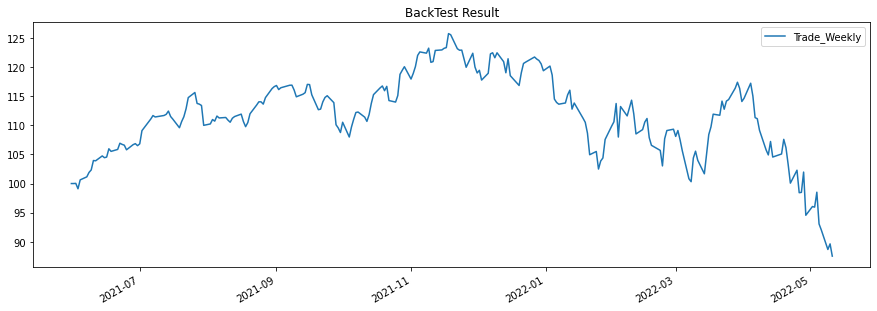

In [14]:
res.plot(title="BackTest Result")
plt.show()

In [15]:
res.get_transactions()

price  quantity
Date       Security                       
2021-06-01 amzn      3218.649902     103.0
           goog      2429.810059     137.0
           msft       245.967743    1355.0
2021-06-07 amzn      3198.010010       2.0
           goog      2466.090088      -1.0
...                          ...       ...
2022-05-02 goog      2343.139893      -2.0
           msft       284.470001     -89.0
2022-05-09 amzn      2175.780029       7.0
           goog      2261.679932      -6.0
           msft       264.579987      -8.0

[127 rows x 2 columns]